In [4]:
# Importing libraries
import numpy as np
import pandas as pd
import mlflow
import warnings
import pickle
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import ticker
from statsmodels.tsa.stattools import adfuller, acf, pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import seaborn as sns
sns.set()
import sys
sys.path.insert(0,'../scripts/')
from data_clean import DataClean
from ml_preprocessing import DataPreprocessor
from extraction_utils import DataExtractor
from df_loaded import *

In [5]:
train_data = load_df_from_csv('../data/train.csv')
train_data = train_data[['Date','Sales']]
train_data = train_data.groupby('Date').agg({'Sales':'mean'})


/home/nhgirma/Documents/GitHub/mine/Rossman-Pharmaceutical-Sales-Pridiction/notebooks/../scripts/df_loaded.py:23: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, na_values=na_values)


In [6]:
manipulator = DataExtractor(train_data, deep=True)

In [7]:
# Scaling all numeric values
manipulator.minmax_scale_columns(['Sales'], range_tup=(-1,1))

,Sales
Date,
2013-01-01,-1.000000
2013-01-02,-0.117299
2013-01-03,-0.194846
2013-01-04,-0.157344
2013-01-05,-0.245886
...,...
2015-07-27,0.366716
2015-07-28,0.161615
2015-07-29,0.082380


In [8]:
# After Scaling
scaled_data = optimize_df(manipulator.df)

In [9]:
# Group Unscaled Data based on Date
data = train_data


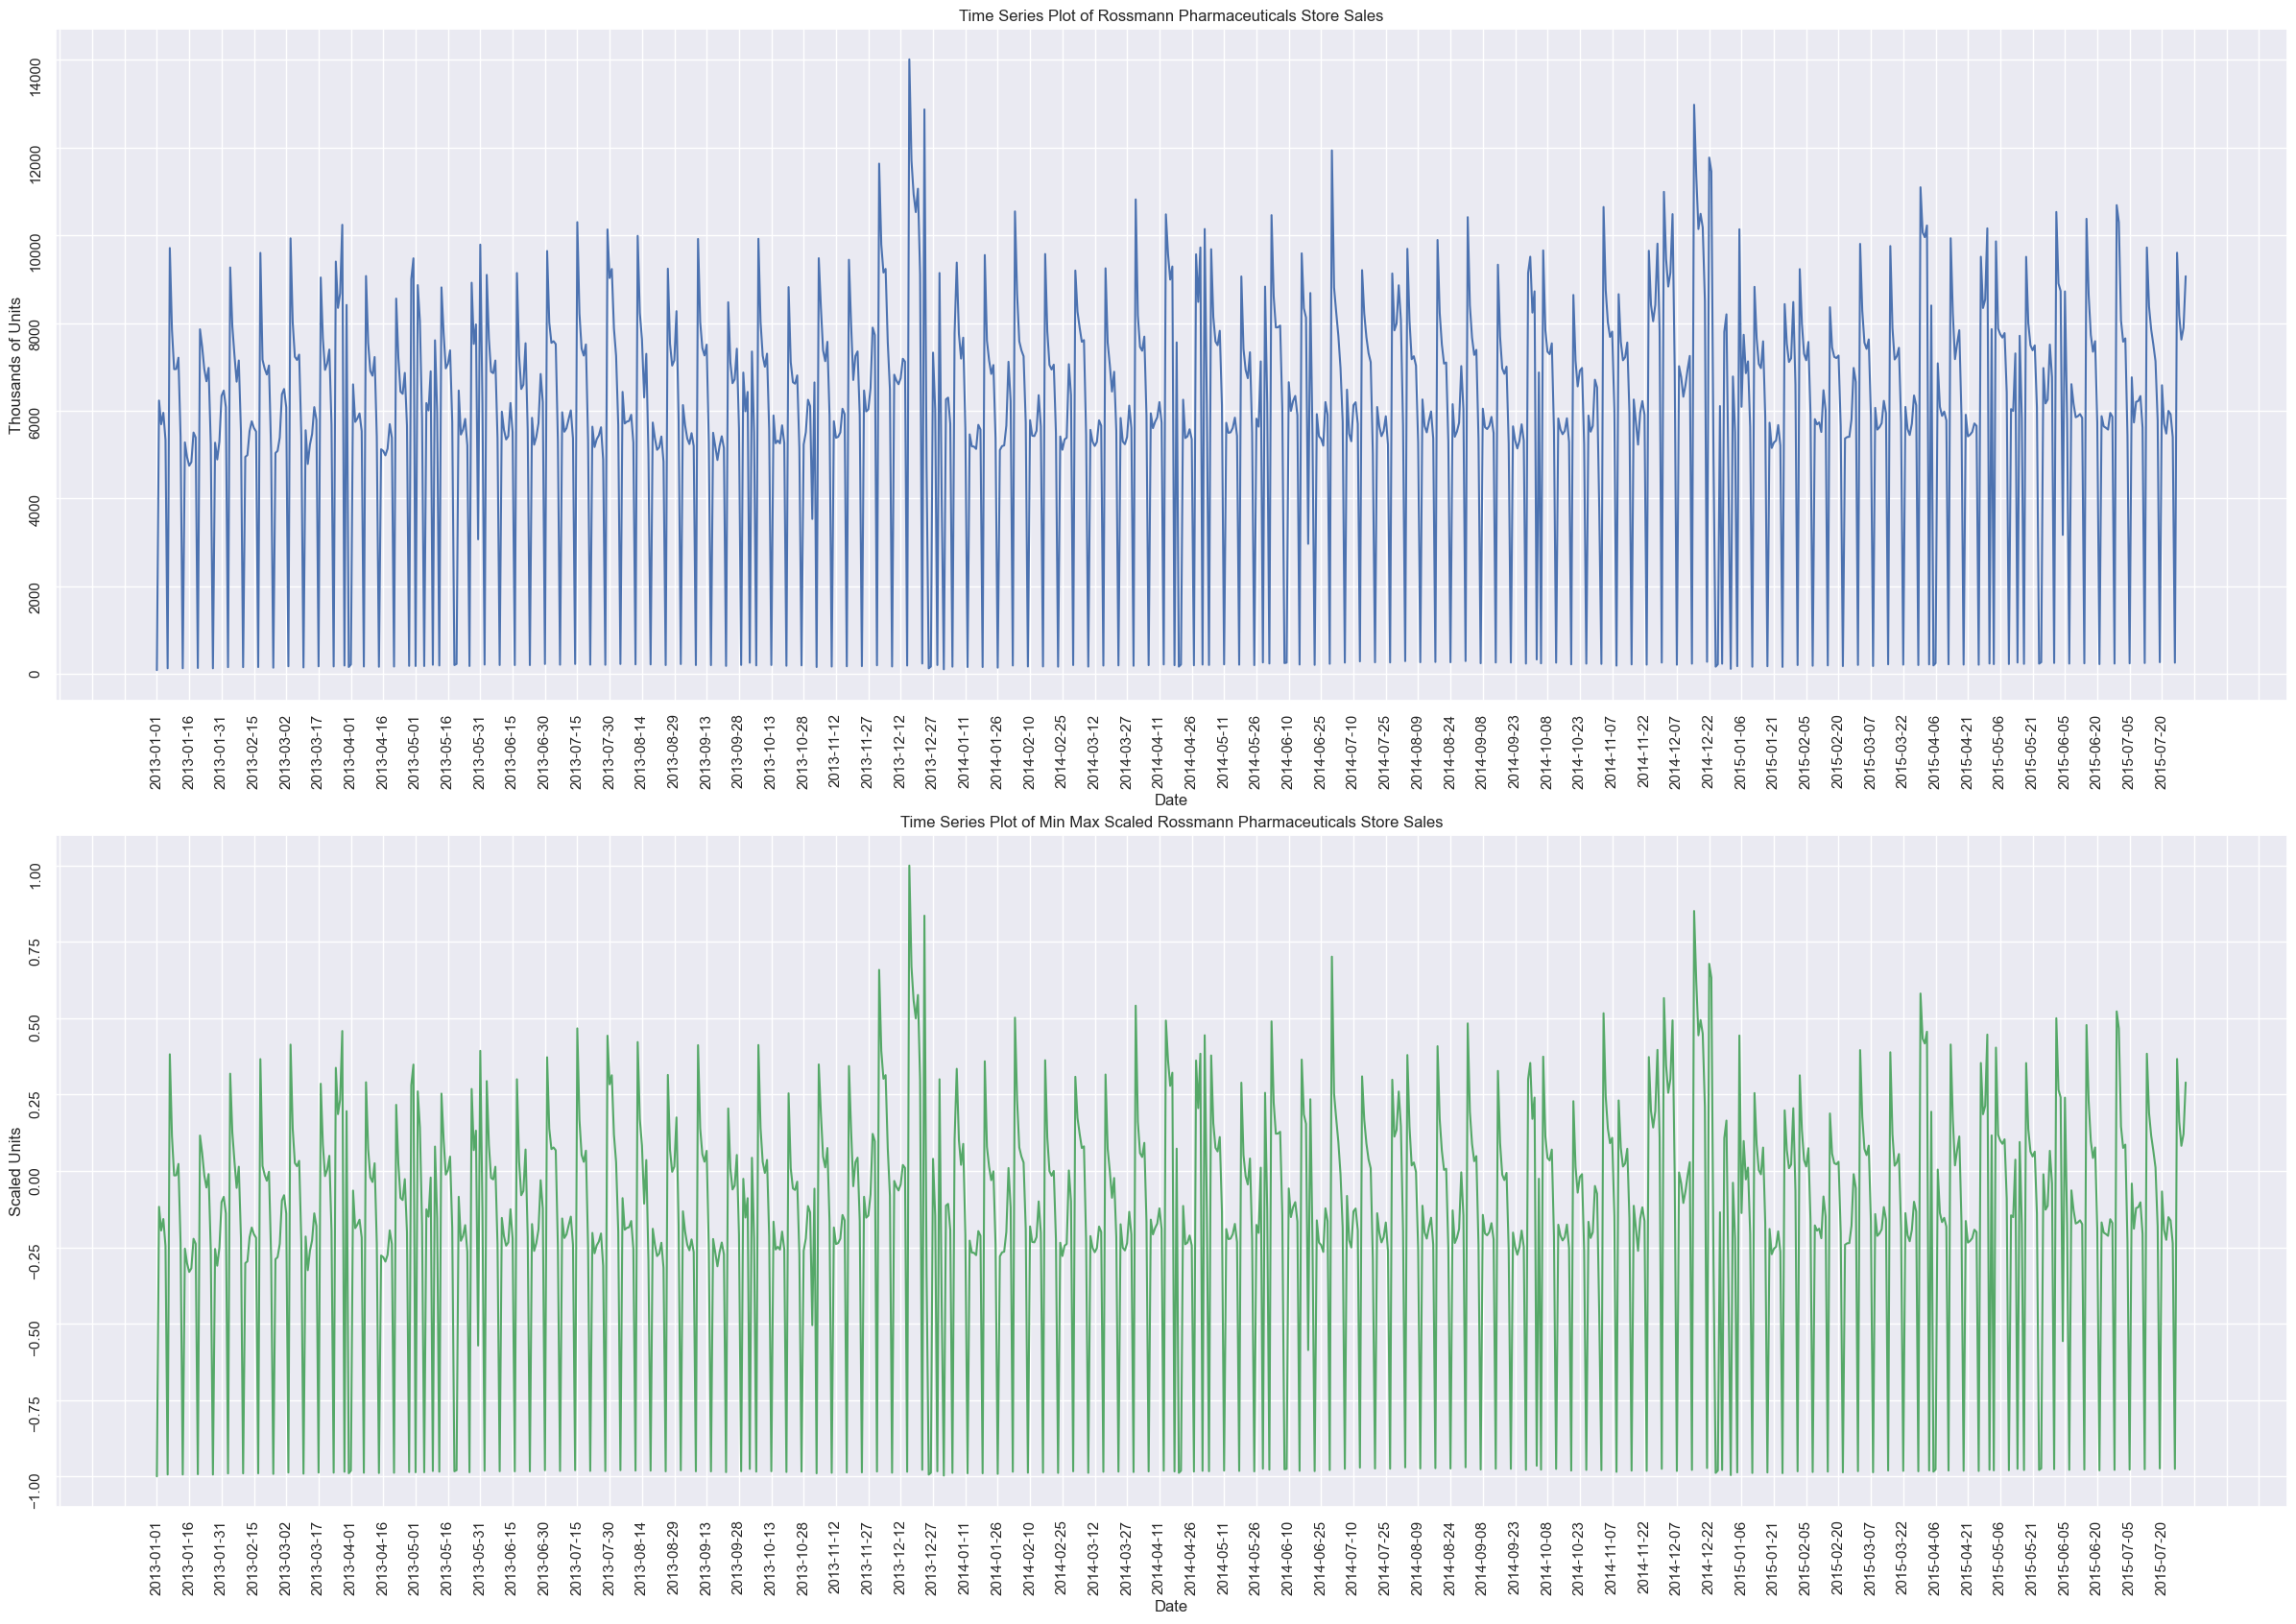

In [10]:
fig = plt.figure()
gs = GridSpec(2, 1, figure=fig)

fig.set_figheight(20)
fig.set_figwidth(30)
fig.tight_layout(pad=15)

M = 100
xticks = ticker.MaxNLocator(M)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(data.index, data.Sales, 'b-')
ax1.xaxis.set_major_locator(xticks)
ax1.tick_params(labelrotation=90)
ax1.set_xlabel('Date')
ax1.set_ylabel('Thousands of Units')
ax1.title.set_text('Time Series Plot of Rossmann Pharmaceuticals Store Sales')
ax1.grid(True)

ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(scaled_data.index, scaled_data.Sales, 'g-')
ax2.xaxis.set_major_locator(xticks)
ax2.tick_params(labelrotation=90)
ax2.set_xlabel('Date')
ax2.set_ylabel('Scaled Units')
ax2.title.set_text(
    'Time Series Plot of Min Max Scaled Rossmann Pharmaceuticals Store Sales')
ax2.grid(True)
plt.show()
